In [27]:
%reload_ext autoreload
%autoreload 2

import os
import sys
import pickle
import logging
from tqdm import tqdm

import numpy as np
from scipy import interpolate
import jax.numpy as jnp

sys.path.append(os.environ['DM21CM_DIR'])
import dm21cm.physics as phys
from dm21cm.data_loader import load_data
from dm21cm.dm_params import DMParams
from dm21cm.evolve import get_z_edges

sys.path.append(os.environ['DH_DIR'])
from darkhistory.spec.spectrum import Spectrum
from darkhistory.main import evolve as dh_evolve
from darkhistory.config import load_data as dh_load_data
import darkhistory.physics as dh_phys

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc_file("../matplotlibrc")

In [4]:
dep_tf = load_data(
    'phot_dep',
    prefix=os.environ['DM21CM_DATA_DIR'] + '/tf/230408x/phot',
    reload=True
)

INFO:root:Loaded photon deposition transfer function.


In [8]:
spec_N = np.zeros((500,))
spec_N[300] = 1.

In [36]:
rs = 29.97
x = 1e-2
nBs = 1

In [37]:
dep_arr = dep_tf(
    in_spec = spec_N,
    sum_result = False,
    rs = rs,
    nBs_s = jnp.array([1.]),
    x_s = jnp.array([x]),
    out_of_bounds_action = 'error',
)

In [38]:
dep_arr = np.array(dep_arr).flatten()

In [39]:
dh_dep_tf_dict = dh_load_data('dep_tf')

In [40]:
dh_dep_tf = dh_dep_tf_dict['highengdep']

In [41]:
dlnz = 0.001
dt = dlnz / phys.hubble(rs)
np.dot(spec_N, dh_dep_tf.get_val(x, phys.chi*x, rs)) * dt

array([ 3.80647822,  3.00855731,  1.03341883, -0.01559652])

In [42]:
dep_arr[:4]/(0.04879016/0.001)

array([4.338409  , 0.07210897, 3.5534062 , 4.436583  ], dtype=float32)

## check generated fits file

In [45]:
from astropy.io import fits

In [46]:
hdul = fits.open('tf_z_2.997E+01_x_1.000E-02_nBs_1.006E+00.fits')

In [54]:
dh_tf = dh_dep_tf.get_val(x, phys.chi*x, rs)

In [52]:
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL+1)

In [56]:
hdul[1].data['HED_TF'][0,:,3]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

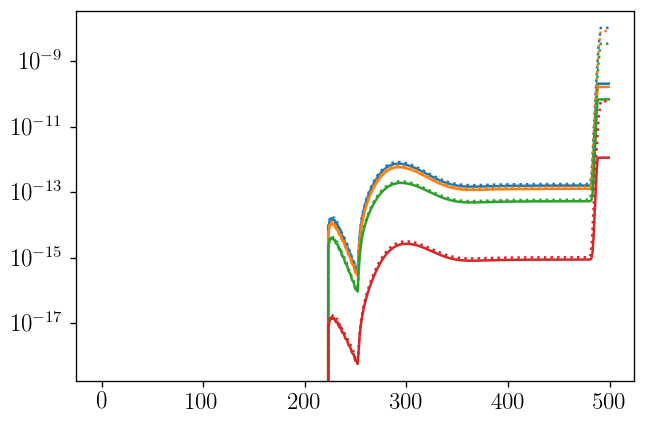

In [57]:
for i in range(4):
    plt.plot(np.abs(hdul[1].data['HED_TF'][0,:,i]), color=f'C{i}')
    plt.plot(np.abs(dh_tf[:,i]), color=f'C{i}', ls=':')
plt.yscale('log')

In [ ]:
abscs_name = 'abscs_230408x'
abscs = {
    'rs' : np.logspace(np.log10(5), np.log10(50), 10),
    'x' : np.array([1e-5, 1e-4, 1e-3, 1e-2, 0.1, 0.3, 0.7, 0.9, 1-1e-3, 1-1e-5]),
    'nBs' : np.array([0.001, 0.262, 0.708, 0.818, 0.888, 0.944, 1.006, 1.102, 4.855, 10.]),
    'photE' : photE_DH(n=500),
    'elecEk' : elecEk_DH(n=500),
    'dep_c' : ['H ion', 'He ion', 'exc', 'heat', 'cont', 'xray'],
    'dlnz' : 0.04879016,
}